<a href="https://colab.research.google.com/github/Subliminal01/Customer-churn-prediction/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML models practice/Bank_customer_churn_prediction.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5826,9507-EXLTT,Female,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),79.35,79.35,Yes
4241,2150-UWTFY,Female,0,Yes,Yes,22,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,61.15,1422.05,Yes
6435,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554,No
2325,3097-PYWXL,Female,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.9,No
354,0623-IIHUG,Female,1,No,No,21,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,41.90,840.1,Yes
3508,2368-GAKKQ,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,7939.25,No
4630,1852-XEMDW,Male,0,No,No,22,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,65.05,1427.55,No
4010,3727-JEZTU,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,No
2417,4307-KWMXE,Male,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,35.75,389.8,No
6112,5553-AOINX,Female,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.90,6891.45,No


In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [ ]:
df['gender']=LE.fit_transform(df['gender'])
df['Partner']=LE.fit_transform(df['Partner'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['PhoneService']=LE.fit_transform(df['PhoneService'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['Churn']=LE.fit_transform(df['Churn'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,,0
753,1,0,0,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,,0
936,0,0,1,1,0,1,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,,0
1082,1,0,1,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,,0
1340,0,0,1,1,0,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,,0
3331,1,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.85,,0
3826,1,0,1,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,,0
4380,0,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,,0
5218,1,0,1,1,0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,,0
6670,0,0,1,1,0,1,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,,0


In [ ]:
df_new=df[df.TotalCharges!=' ']
print(df.shape)
print(df_new.shape)

(7043, 20)
(7032, 20)


In [ ]:
df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)
df_new.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df_new.replace('No phone service','No',inplace=True)
df_new.replace('No internet service','No',inplace=True)
df_new.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,No,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
df_new['MultipleLines']=LE.fit_transform(df_new['MultipleLines'])
df_new['OnlineSecurity']=LE.fit_transform(df_new['OnlineSecurity'])
df_new['OnlineBackup']=LE.fit_transform(df_new['OnlineBackup'])
df_new['DeviceProtection']=LE.fit_transform(df_new['DeviceProtection'])
df_new['TechSupport']=LE.fit_transform(df_new['TechSupport'])
df_new['StreamingTV']=LE.fit_transform(df_new['StreamingTV'])
df_new['StreamingMovies']=LE.fit_transform(df_new['StreamingMovies'])
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df1=pd.get_dummies(data=df_new,columns=['InternetService','Contract','PaymentMethod'])
print(df1.shape)
df1.head()

(7032, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
df1_y=df1['Churn']
df1.drop('Churn',axis='columns',inplace=True)

   gender  ...  PaymentMethod_Mailed check
0       0  ...                           0
1       1  ...                           1
2       1  ...                           1
3       1  ...                           0
4       0  ...                           0

[5 rows x 26 columns]
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,df1_y,test_size=0.2)

In [ ]:
from tensorflow import keras
model=keras.Sequential([
      keras.layers.Dense(26,input_shape=(26,),activation='relu'),
      keras.layers.Dense(10,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5238 - accuracy: 0.7374
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7908
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7993
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8018
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8062
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accura

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7925


[0.473228394985199, 0.7924662232398987]

In [ ]:
y_predicted=model.predict(x_test)
y_predicted

array([[0.59448886],
       [0.90098155],
       [0.01826695],
       ...,
       [0.07685122],
       [0.65319014],
       [0.84774435]], dtype=float32)

In [ ]:
y_pred=np.round(y_pred)
y_pred[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
y_test.head(10)

2161    1
1929    0
1946    0
3825    0
3209    1
1188    0
39      1
4680    0
804     1
947     0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      1133
         1.0       0.48      0.68      0.56       274

    accuracy                           0.79      1407
   macro avg       0.69      0.75      0.71      1407
weighted avg       0.83      0.79      0.80      1407



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[930, 203],
       [ 89, 185]])

Text(33.0, 0.5, 'true_values')

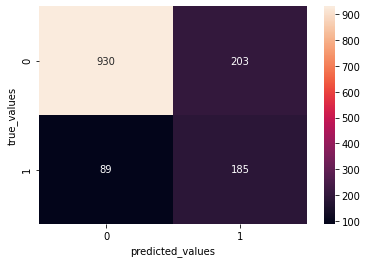

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted_values')
plt.ylabel('true_values')